In [90]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
import time

In [3]:
lfw = datasets.fetch_lfw_people(min_faces_per_person = 100, resize =0.4)

In [4]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
lfw['data'].shape

(1140, 1850)

In [6]:
lfw['images'].shape

(1140, 50, 37)

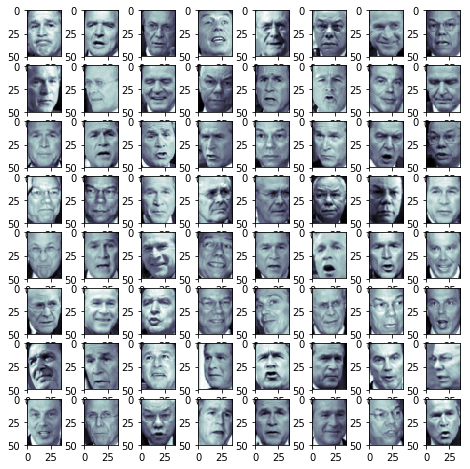

In [7]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i], cmap = plt.cm.bone)



In [8]:
x = lfw.data
y = lfw.target
x.shape

(1140, 1850)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)
pca = PCA()
pca.fit(x_train)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [65]:
pca.components_.shape

(855, 1850)

In [66]:
k = 0
total = sum(pca.explained_variance_)
current_sum = 0
while current_sum/total < 0.99:
    current_sum += pca.explained_variance_[k]
    k += 1
k

316

In [80]:
pca = PCA(n_components = k, whiten = True)
x_transformed_data = pca.fit_transform(x_train)
x_transformed_data.shape

(855, 316)

# getting original images back

In [81]:
x_approx_data = pca.inverse_transform(x_transformed_data)

In [82]:
x_approx_data.shape

(855, 1850)

In [83]:
x_approx_data = x_approx_data.reshape((855,50,37))


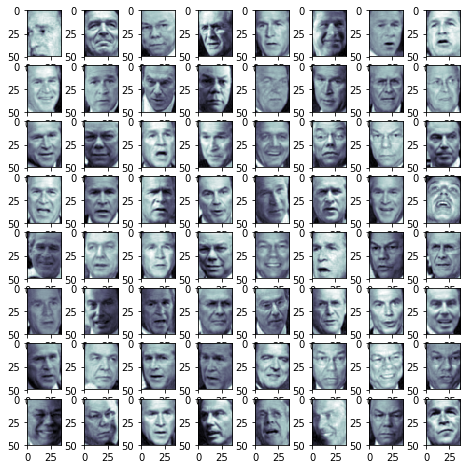

In [84]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_data[i], cmap = plt.cm.bone)




In [85]:
eigenvectors = pca.components_
eigenvectors.shape

(316, 1850)

In [86]:
eigenfaces = eigenvectors.reshape((316,50,37))

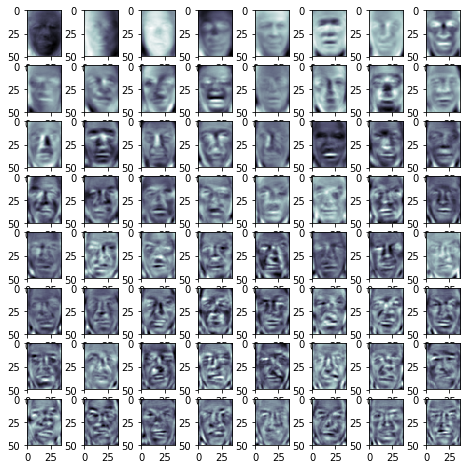

In [87]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i], cmap = plt.cm.bone)





In [89]:
x_train_pca = x_transformed_data
x_test_pca = pca.transform(x_test)

In [92]:
rf = ensemble.RandomForestClassifier()
rf.fit(x_train,y_train)
start = time.time()
y_pred = rf.predict(x_test)
end = time.time()
print(end - start)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.0032181739807128906
             precision    recall  f1-score   support

          0       0.63      0.70      0.67        61
          1       0.71      0.42      0.53        36
          2       0.63      0.91      0.74       122
          3       0.67      0.19      0.30        31
          4       0.82      0.26      0.39        35

avg / total       0.67      0.65      0.61       285

[[ 43   0  16   2   0]
 [  9  15  12   0   0]
 [  8   1 111   1   1]
 [  4   2  18   6   1]
 [  4   3  19   0   9]]


In [93]:
rf = ensemble.RandomForestClassifier()
rf.fit(x_train_pca,y_train)
start = time.time()
y_pred = rf.predict(x_test_pca)
end = time.time()
print(end - start)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.0011608600616455078
             precision    recall  f1-score   support

          0       0.36      0.30      0.32        61
          1       0.31      0.11      0.16        36
          2       0.52      0.84      0.65       122
          3       0.20      0.06      0.10        31
          4       0.53      0.23      0.32        35

avg / total       0.43      0.47      0.42       285

[[ 18   1  39   2   1]
 [ 10   4  17   3   2]
 [ 12   4 103   2   1]
 [  4   1  21   2   3]
 [  6   3  17   1   8]]
